Imports all libraray that are using in the project

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import plotly.express as px
# import plotly.graph_objects as go
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
import numpy as np


In [4]:
#Read csv file
df = pd.read_csv('/Users/admin/Desktop/NewCourseWork_AI/FeatureEngineering/vegetable_prices_with_festivals.csv', na_values=[], keep_default_na=False)


In [5]:
#Checking columns
print(df.columns)


Index(['Commodity', 'Date', 'Unit', 'Minimum', 'Maximum', 'Average', 'Season',
       'Variety', 'Festive_Season', 'Price_Range', 'Fluctuation', 'Month'],
      dtype='object')


In [6]:
#Checking cloumn top of the table 
df.head()

,Commodity,Date,Unit,Minimum,Maximum,Average,Season,Variety,Festive_Season,Price_Range,Fluctuation,Month
0,Tomato,2021-05-01,Kg,50.0,60.0,55.0,Pre-winter,Big(Nepali),None,10.0,0.1818181818181818,5.0
1,Tomato,2021-05-01,Kg,50.0,60.0,55.0,Pre-winter,Big(Indian),None,10.0,0.1818181818181818,5.0
2,Tomato,2021-05-01,Kg,30.0,35.0,32.5,Pre-winter,Small(Local),None,5.0,0.1538461538461538,5.0
3,Tomato,2021-05-01,Kg,30.0,35.0,32.5,Pre-winter,Small(Tunnel),None,5.0,0.1538461538461538,5.0
4,Tomato,2021-05-01,KG,40.0,45.0,42.5,Pre-winter,Small(Indian),None,5.0,0.1176470588235294,5.0


In [7]:
#Checking columns buttom of the table
df.tail()

,Commodity,Date,Unit,Minimum,Maximum,Average,Season,Variety,Festive_Season,Price_Range,Fluctuation,Month
122781,Clive,,KG,,,,Rainy,Green,None,,,
122782,Fish,,KG,,,,Rainy,Fresh(Rahu),None,,,
122783,Fish,,KG,,,,Rainy,Fresh(Bachuwa),None,,,
122784,Fish,,KG,,,,Rainy,Fresh(Chhadi),None,,,
122785,Fish,,KG,,,,Rainy,Fresh(Mungari),None,,,


In [8]:
# Shows summary of the dataset: columns, non-null counts, data types, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122786 entries, 0 to 122785
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Commodity       122786 non-null  object
 1   Date            122786 non-null  object
 2   Unit            122786 non-null  object
 3   Minimum         122786 non-null  object
 4   Maximum         122786 non-null  object
 5   Average         122786 non-null  object
 6   Season          122786 non-null  object
 7   Variety         122786 non-null  object
 8   Festive_Season  122786 non-null  object
 9   Price_Range     122786 non-null  object
 10  Fluctuation     122786 non-null  object
 11  Month           122786 non-null  object
dtypes: object(12)
memory usage: 11.2+ MB


In [9]:
# Shows statistical summary of numeric columns
df.describe()

,Commodity,Date,Unit,Minimum,Maximum,Average,Season,Variety,Festive_Season,Price_Range,Fluctuation,Month
count,122786,122786,122786,122786,122786,122786,122786,122786,122786,122786,122786,122786
unique,104,291,8,134,144,261,7,56,4,31,144,13
top,Chilli,,KG,,,,Spring,Standard,None,,,
freq,5971,94037,80990,77462,77462,77462,36960,56732,115638,77462,77462,94037


In [10]:
#Checking any null or not in the columns 
df.isnull().sum()


Commodity         0
Date              0
Unit              0
Minimum           0
Maximum           0
Average           0
Season            0
Variety           0
Festive_Season    0
Price_Range       0
Fluctuation       0
Month             0
dtype: int64

In [11]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [12]:
#Checking festive season
print(df['Festive_Season'].unique())


['None' 'Dashain' 'Tihar' 'Holi']


In [13]:
# Convert the 'Date' column to datetime format

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [14]:
#Add this to count to know how many rows matched each festival:
print(df['Festive_Season'].value_counts())


Festive_Season
None       115638
Dashain      2495
Tihar        2495
Holi         2158
Name: count, dtype: int64


In [15]:
# Unique values in some key columns
print(df["Commodity"].unique())
print(df["Variety"].unique())
print(df["Season"].unique())
print(df["Festive_Season"].unique())


['Tomato' 'Potato' 'Onion' 'Carrot(Local)' 'Carrot(Terai)'
 'Cabbage(Local)' 'Cabbage(Terai)' 'Cabbage' 'Cauli' 'Raddish' 'Brinjal'
 'Green' 'French' 'Sword' 'Bitter' 'Bottle' 'Pumpkin' 'Squash(Long)'
 'Squash(Round)' 'Turnip' 'Okara' 'Sweet' 'Barela' 'Arum' 'Christophine'
 'Brd' 'Spinach' 'Cress' 'Mustard' 'Fenugreek' 'Bakula' 'Yam'
 'Mushroom(Kanya)' 'Mushroom(Button)' 'Brocauli' 'Sugarbeet' 'Red'
 'Lettuce' 'Knolkhol' 'Celery' 'Parseley' 'Fennel' 'Mint' 'Tamarind'
 'Bamboo' 'Tofu' 'Gundruk' 'Apple(Jholey)' 'Apple(Fuji)' 'Banana' 'Lime'
 'Pomegranate' 'Grapes(Green)' 'Grapes(Black)' 'Orange(Nepali)'
 'Orange(Indian)' 'Water' 'Pineapple' 'Cucumber(Local)' 'Cucumber(Hybrid)'
 'Pear(Chinese)' 'Papaya(Indian)' 'Guava' 'Mombin' 'Kinnow' 'Strawberry'
 'Kiwi' 'Ginger' 'Chilli' 'Capsicum' 'Garlic' 'Coriander' 'Fish'
 'Papaya(Nepali)' 'Pointed' 'Jack' 'Lemon' 'Drumstick' 'Smooth'
 'Asparagus' 'Sugarcane' 'Neuro' 'Clive' 'Bauhania' 'Cow' 'Sponge' 'Snake'
 'Mango(Calcutte)' 'Mango(Maldah)' 'Cow

In [16]:
df['Average'] = pd.to_numeric(df['Average'], errors='coerce')


In [17]:
print(df['Average'].dtype)
print(df['Average'].isnull().sum())
print(df['Average'].head(10))


float64
77462
0    55.0
1    55.0
2    32.5
3    32.5
4    42.5
5    42.5
6    42.5
7    32.5
8    29.0
9    62.5
Name: Average, dtype: float64


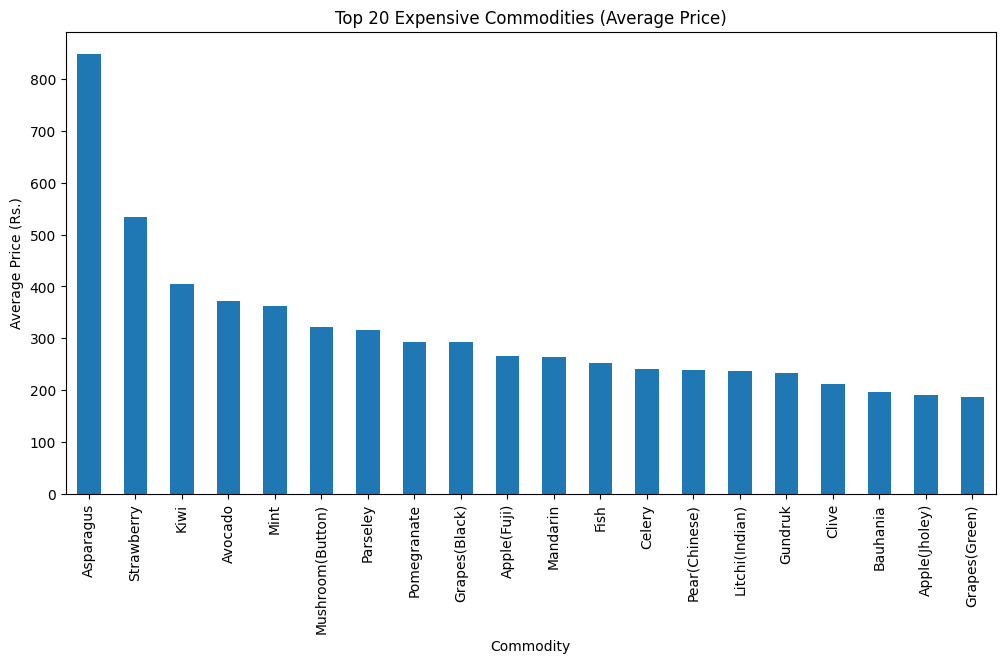

In [18]:
#
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
df.groupby('Commodity')['Average'].mean().sort_values(ascending=False).head(20).plot(kind='bar')
plt.title("Top 20 Expensive Commodities (Average Price)")
plt.ylabel("Average Price (Rs.)")
plt.xticks(rotation=90)
plt.show()


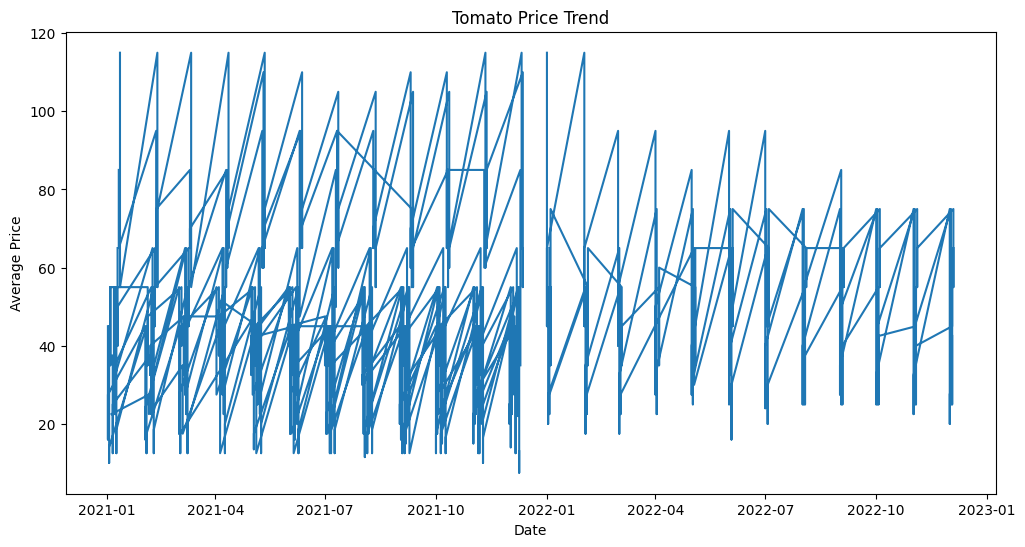

In [19]:
#Price Trend for a Commodity (e.g., Tomato)
tomato_df = df[df['Commodity'].str.contains("Tomato")]
plt.figure(figsize=(12,6))
plt.plot(tomato_df['Date'], tomato_df['Average'])
plt.title("Tomato Price Trend")
plt.xlabel("Date")
plt.ylabel("Average Price")
plt.show()


In [20]:
# These are numeric values, but their dtype is object.
#  I am convert them to numeric types (e.g., float), otherwise numeric operations (mean, median, plots) won’t work.
df['Minimum'] = pd.to_numeric(df['Minimum'], errors='coerce')
df['Maximum'] = pd.to_numeric(df['Maximum'], errors='coerce')
df['Average'] = pd.to_numeric(df['Average'], errors='coerce')


In [21]:
#Applying Normalization
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

# Only normalize the numeric columns
df[['Minimum', 'Maximum', 'Average']] = scaler.fit_transform(df[['Minimum', 'Maximum', 'Average']])


In [22]:
#Checking 
print(df[['Minimum', 'Maximum', 'Average']].head())


    Minimum   Maximum   Average
0  0.017506  0.016722  0.016422
1  0.017506  0.016722  0.016422
2  0.010361  0.008361  0.008643
3  0.010361  0.008361  0.008643
4  0.013934  0.011706  0.012100


#Feature Engineering

In [23]:
# Price range feature
df['Price_Range'] = df['Maximum'] - df['Minimum']

# Price fluctuation ratio
df['Fluctuation'] = (df['Maximum'] - df['Minimum']) / df['Average']

# Extract month from date
df['Month'] = df['Date'].dt.month


In [24]:
import pandas as pd

# Load dataset
df = pd.read_csv("/Users/admin/Desktop/NewCourseWork_AI/FeatureEngineering/vegetable_prices_with_festivals.csv")

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Convert price columns to numeric (in case they are stored as strings)
df['Minimum'] = pd.to_numeric(df['Minimum'], errors='coerce')
df['Maximum'] = pd.to_numeric(df['Maximum'], errors='coerce')
df['Average'] = pd.to_numeric(df['Average'], errors='coerce')

# Feature Engineering
df['Price_Range'] = df['Maximum'] - df['Minimum']
df['Fluctuation'] = (df['Maximum'] - df['Minimum']) / df['Average']
df['Month'] = df['Date'].dt.month

# Save updated dataset
df.to_csv("/Users/admin/Desktop/NewCourseWork_AI/FeatureEngineering/vegetable_prices_with_festivals.csv", index=False)

print("Feature engineering completed and saved.")


Feature engineering completed and saved.


In [25]:
print(df.columns)


Index(['Commodity', 'Date', 'Unit', 'Minimum', 'Maximum', 'Average', 'Season',
       'Variety', 'Festive_Season', 'Price_Range', 'Fluctuation', 'Month'],
      dtype='object')


In [26]:
print(df[['Price_Range', 'Fluctuation', 'Month']].head())


   Price_Range  Fluctuation  Month
0         10.0     0.181818    5.0
1         10.0     0.181818    5.0
2          5.0     0.153846    5.0
3          5.0     0.153846    5.0
4          5.0     0.117647    5.0


#One-Hot Encoding

In [27]:
df_encoded = pd.get_dummies(df[['Commodity', 'Variety', 'Season', 'Festive_Season', 'Month','Price_Range', 'Fluctuation']], drop_first=True)
X = df_encoded
y = df['Average']


In [28]:
print(df['Average'].describe())


count    45324.000000
mean       123.082991
std        127.605530
min          7.500000
25%         47.500000
50%         85.000000
75%        155.000000
max       2900.000000
Name: Average, dtype: float64


In [29]:
#Fill the null value using fillna
df['Average'] = df['Average'].fillna(df['Average'].median())


In [30]:
print(df['Average'].isna().sum())


0


#Train-Test Split

In [31]:
for col in X.columns:
    if X[col].dtype == 'object':
        print(f"{col} unique values:\n", X[col].unique()[:10])  # Show first 10 unique values


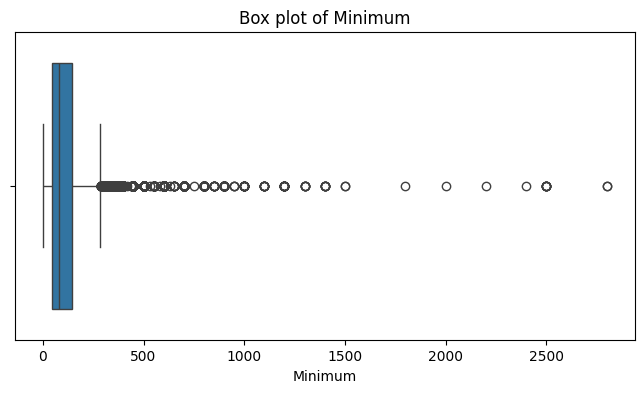

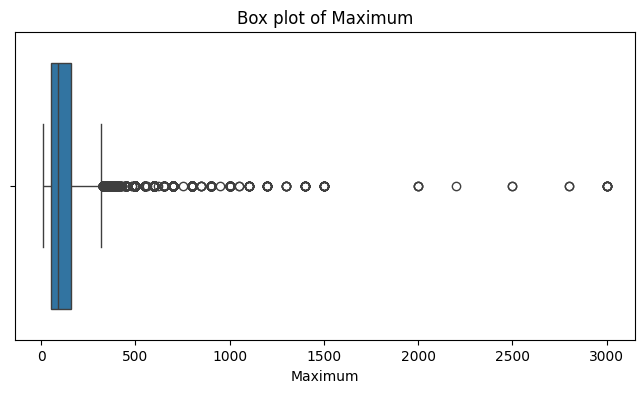

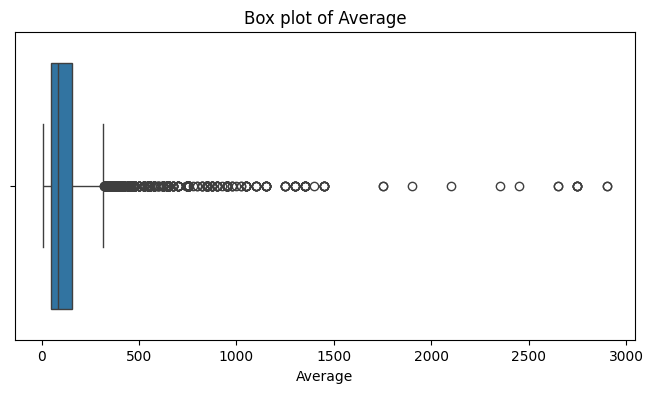

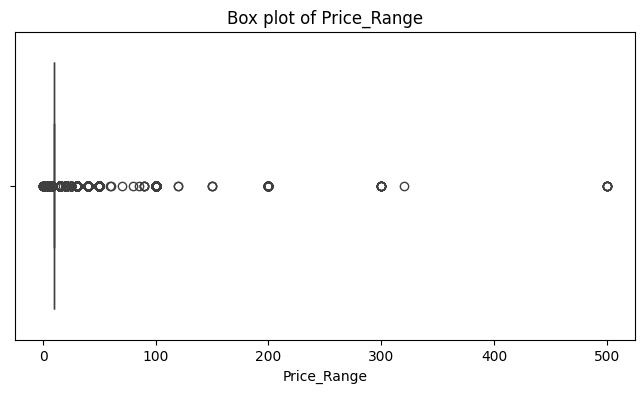

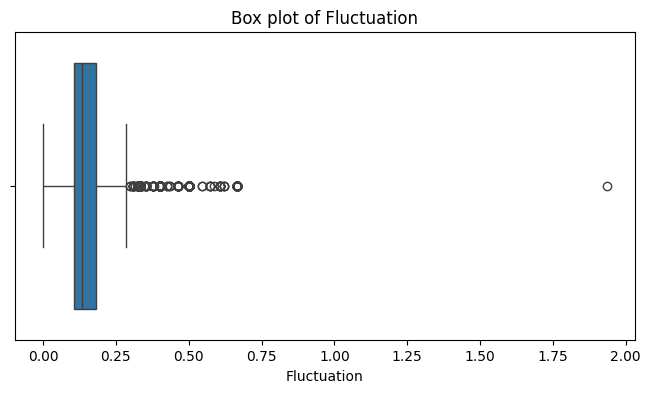

In [32]:
#Visualize outliers
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("/Users/admin/Desktop/NewCourseWork_AI/FeatureEngineering/vegetable_prices_with_festivals.csv")

# Optional: Convert Date if needed
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Create box plots for numeric columns
numeric_cols = ['Minimum', 'Maximum', 'Average', 'Price_Range', 'Fluctuation']

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f"Box plot of {col}")
    plt.show()


In [33]:
# Convert 'Minimum' and 'Maximum' columns to numeric values
df['Minimum'] = pd.to_numeric(df['Minimum'], errors='coerce')
df['Maximum'] = pd.to_numeric(df['Maximum'], errors='coerce')

# Handle any NaN values in these columns if necessary (e.g., fill with mean/median)
df['Minimum'] = df['Minimum'].fillna(df['Minimum'].mean())
df['Maximum'] = df['Maximum'].fillna(df['Maximum'].mean())

# One-hot encode 'Season' column
df_encoded = pd.get_dummies(df['Season'], prefix='Season', drop_first=True)

# Add the encoded 'Season' columns to the original dataframe
df = pd.concat([df, df_encoded], axis=1)

# Print out to check changes
print(df.head())


  Commodity       Date Unit  Minimum  Maximum  Average      Season  \
0    Tomato 2021-05-01   Kg     50.0     60.0     55.0  Pre-winter   
1    Tomato 2021-05-01   Kg     50.0     60.0     55.0  Pre-winter   
2    Tomato 2021-05-01   Kg     30.0     35.0     32.5  Pre-winter   
3    Tomato 2021-05-01   Kg     30.0     35.0     32.5  Pre-winter   
4    Tomato 2021-05-01   KG     40.0     45.0     42.5  Pre-winter   

         Variety Festive_Season  Price_Range  Fluctuation  Month  \
0    Big(Nepali)            NaN         10.0     0.181818    5.0   
1    Big(Indian)            NaN         10.0     0.181818    5.0   
2   Small(Local)            NaN          5.0     0.153846    5.0   
3  Small(Tunnel)            NaN          5.0     0.153846    5.0   
4  Small(Indian)            NaN          5.0     0.117647    5.0   

   Season_Pre-winter  Season_Rainy  Season_Spring  Season_Summer  \
0               True         False          False          False   
1               True         False

In [ ]:


#
# X = features, y = target

# Example: Assume target column name is 'Average'
# and my features are all other columns except 'Average'

# Step 1: Separate features and target
y = df['Average'].copy()
X = df.drop(columns=['Average'])

# Step 2: Clean target column (remove 'Rs ' and commas, convert to float)
y = y.replace({'Rs ': '', ',': ''}, regex=True).astype(float)

# Step 3: Identify categorical and numeric columns in X
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=[np.number]).columns

# Step 4: Clean numeric columns if any have 'Rs ' or commas stored as strings
for col in numeric_cols:
    if X[col].dtype == 'object':
        X[col] = X[col].str.replace('Rs ', '').str.replace(',', '').astype(float)

# Step 5: Encode categorical columns using one-hot encoding
X_encoded = pd.get_dummies(X[categorical_cols], drop_first=True)

# Step 6: Combine numeric and encoded categorical columns
X_final = pd.concat([X[numeric_cols], X_encoded], axis=1)

# Optional Step 7: Fill missing values in features (if any)
X_final = X_final.fillna(X_final.median())

# Optional Step 8: Fill missing values in target (y) if necessary
y = y.fillna(y.median())

# Step 9: Create model and KFold cross-validation setup
model = RandomForestRegressor(n_estimators=100, random_state=42)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Step 10: Run cross-validation scoring using Negative MSE
neg_mse_scores = cross_val_score(model, X_final, y, cv=kfold, scoring='neg_mean_squared_error')

# Step 11: Convert negative MSE to RMSE
rmse_scores = np.sqrt(-neg_mse_scores)

# Step 12: Print RMSE scores
print("RMSE for each fold:", rmse_scores)
print("Average RMSE:", rmse_scores.mean())

# Optional: Evaluate R² scores as well
r2_scores = cross_val_score(model, X_final, y, cv=kfold, scoring='r2')
print("R² score for each fold:", r2_scores)
print("Average R² score:", r2_scores.mean())


In [86]:
#Hyperparameter tuning with GridSearchCV

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Split data into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Define model
model = RandomForestRegressor(random_state=42)

# Define hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Setup GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit grid search
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best CV RMSE:", np.sqrt(-grid_search.best_score_))



Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best CV RMSE: 18.395783453843162


In [ ]:
# Evaluate on test set
# Best model from grid search
best_model = grid_search.best_estimator_

# Predict on test data
y_pred = best_model.predict(X_test)

# Calculate metrics
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
r2_test = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse_test:.3f}")
print(f"Test R²: {r2_test:.3f}")

# Save model
joblib.dump(model, "random_forest_model.joblib")
print("✅ Model saved as 'random_forest_model.joblib'")



Test RMSE: 12.942
Test R²: 0.989
✅ Model saved as 'random_forest_model.joblib'


#Feature Importance

In [ ]:
#Feature Importance
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = best_model.feature_importances_
feature_names = X_final.columns

# Create DataFrame for plotting
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False).head(20)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title('Top 20 Feature Importances')
plt.tight_layout()
plt.show()


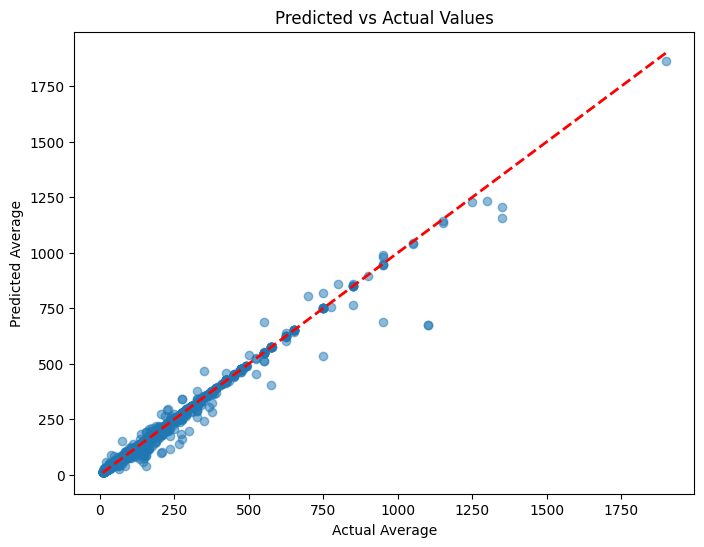

In [88]:
#Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Average')
plt.ylabel('Predicted Average')
plt.title('Predicted vs Actual Values')
plt.show()


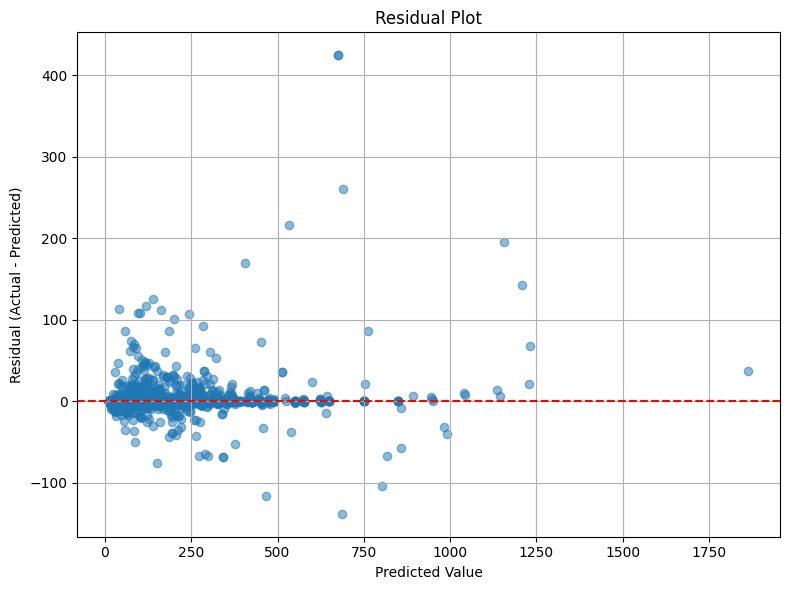

In [92]:
#Residual plot
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Value")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residual Plot")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

rf = grid_search.best_estimator_  # use the best model from grid search

# Assuming rf is your trained RandomForestRegressor
importances = rf.feature_importances_
feature_names = X.columns  # Use your actual feature column names here


# Sort
indices = np.argsort(importances)[::-1]
sorted_features = feature_names[indices]
sorted_importances = importances[indices]


plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), sorted_importances, align="center")
plt.xticks(range(len(importances)), sorted_features, rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# import pandas as pd
# import joblib
# from datetime import datetime

# # Load trained model
# model = joblib.load("random_forest_model.joblib")

# # Load dataset
# df = pd.read_csv("/Users/admin/Desktop/NewCourseWork_AI/FeatureEngineering/vegetable_prices_with_festivals.csv")

# # Extract valid options from dataset
# valid_commodities = df["Commodity"].unique()
# valid_varieties = df["Variety"].unique()
# valid_seasons = df["Season"].unique()
# valid_festives_raw = df["Festive_Season"].fillna("None").unique()
# valid_festives = [str(x) if str(x).strip() != "" else "None" for x in valid_festives_raw]

# # Prepare the full list of columns used during training for one-hot encoding alignment
# # You should have saved this during training, for example:
# # all_columns = joblib.load("model_feature_columns.joblib")

# # If you don't have saved columns, here’s a quick way to get them:
# # Create dummy columns on your full dataset with Month feature added
# df["Month"] = pd.to_datetime(df["Date"]).dt.month
# all_columns = pd.get_dummies(df[["Commodity", "Variety", "Season", "Festive_Season"]])
# all_columns["Month"] = df["Month"]
# all_columns = all_columns.columns

# # Get user inputs
# user_date = input("📅 Enter date (YYYY-MM-DD): ")
# try:
#     user_month = datetime.strptime(user_date, "%Y-%m-%d").month
# except ValueError:
#     print("❌ Invalid date format! Please enter date like 2024-11-01")
#     exit()

# user_commodity = input("🥬 Enter Commodity (e.g., Tomato): ").strip()
# if user_commodity not in valid_commodities:
#     print(f"❌ '{user_commodity}' is not in the dataset.")
#     print(f"✅ Available commodities: {', '.join(valid_commodities)}")
#     exit()

# user_variety = input("🔍 Enter variety (e.g., Small(Local)): ").strip()
# if user_variety not in valid_varieties:
#     print(f"❌ '{user_variety}' variety is not found.")
#     print(f"✅ Available varieties: {', '.join(valid_varieties)}")
#     exit()

# user_season = input("☀️ Enter season (e.g., Rainy, Autumn): ").strip()
# if user_season not in valid_seasons:
#     print(f"❌ '{user_season}' is not a valid season.")
#     print(f"✅ Available seasons: {', '.join(valid_seasons)}")
#     exit()

# user_festive = input("🎉 Enter festive season (e.g., Dashain, None): ").strip()
# if user_festive not in valid_festives:
#     print(f"❌ '{user_festive}' is not found in festive seasons.")
#     print(f"✅ Available festive seasons: {', '.join(valid_festives)}")
#     exit()

# # Create DataFrame for prediction
# input_df = pd.DataFrame([{
#     "Commodity": user_commodity,
#     "Variety": user_variety,
#     "Season": user_season,
#     "Festive_Season": user_festive,
#     "Month": user_month
# }])

# # One-hot encode input and align columns with training features
# input_encoded = pd.get_dummies(input_df)
# input_encoded = input_encoded.reindex(columns=all_columns, fill_value=0)

# # Predict average price
# predicted_price = model.predict(input_encoded)[0]

# print(f"\n💰 Predicted average price for {user_commodity} on {user_date} is: Rs. {predicted_price:.2f}")


